buy and hold strategy python
### 수정해야할 것들.
1. 데이터 경로 맞추기.

In [6]:
df = pd.read_csv('new_us_etf_stock.csv',index_col='Date', parse_dates=['Date'])

In [7]:
df.head()

,Code,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1980-12-12,AAPL,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,AAPL,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,AAPL,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,AAPL,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,AAPL,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [8]:
price_df = df.loc[:,['Adj Close']].copy()

In [9]:
price_df

,Adj Close
Date,
1980-12-12,0.410525
1980-12-15,0.389106
1980-12-16,0.360548
1980-12-17,0.369472
1980-12-18,0.380182
...,...
2019-06-18,109.650002
2019-06-19,109.620003
2019-06-20,110.320000


In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('AMZN_결측값.csv',index_col='Date', parse_dates=['Date'])

<Axes: xlabel='Date'>

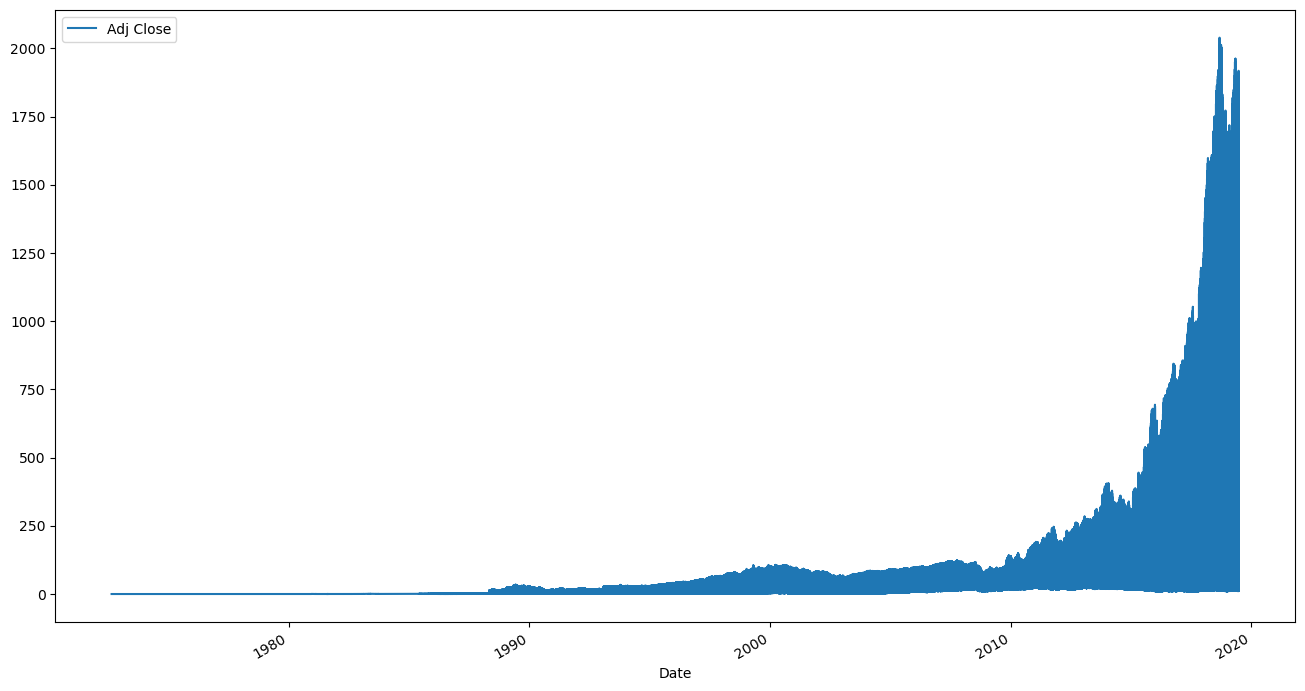

In [15]:
price_df.plot(figsize=(16,9))

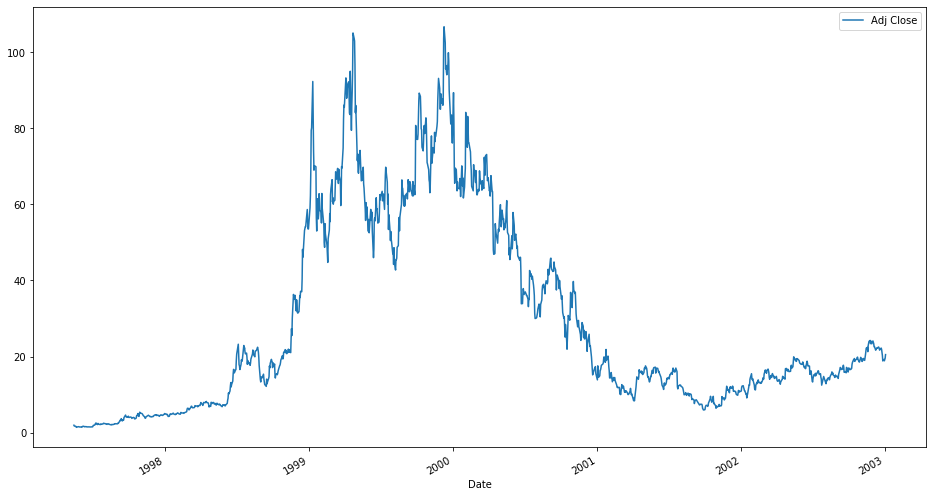

In [8]:
from_date = '1997-01-03'
to_date = '2003-01-03'
price_df.loc[from_date:to_date].plot(figsize=(16,9))

In [9]:
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()

In [10]:
price_df.head(10)

,Adj Close,daily_rtn
Date,,
1997-05-15,1.958333,NaN
1997-05-16,1.729167,-0.117021
1997-05-19,1.708333,-0.012049
1997-05-20,1.635417,-0.042683
1997-05-21,1.427083,-0.127389
1997-05-22,1.395833,-0.021898
1997-05-23,1.500000,0.074627
1997-05-27,1.583333,0.055555
1997-05-28,1.531250,-0.032895


In [11]:
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()

In [12]:
price_df.tail(10)

,Adj Close,daily_rtn,st_rtn
Date,,,
2019-06-11,1863.699951,0.001650,951.676733
2019-06-12,1855.319946,-0.004496,947.397580
2019-06-13,1870.300049,0.008074,955.046996
2019-06-14,1869.670044,-0.000337,954.725291
2019-06-17,1886.030029,0.008750,963.079328
2019-06-18,1901.369995,0.008133,970.912503
2019-06-19,1908.790039,0.003902,974.701462
2019-06-20,1918.189941,0.004925,979.501413
2019-06-21,1911.300049,-0.003592,975.983170


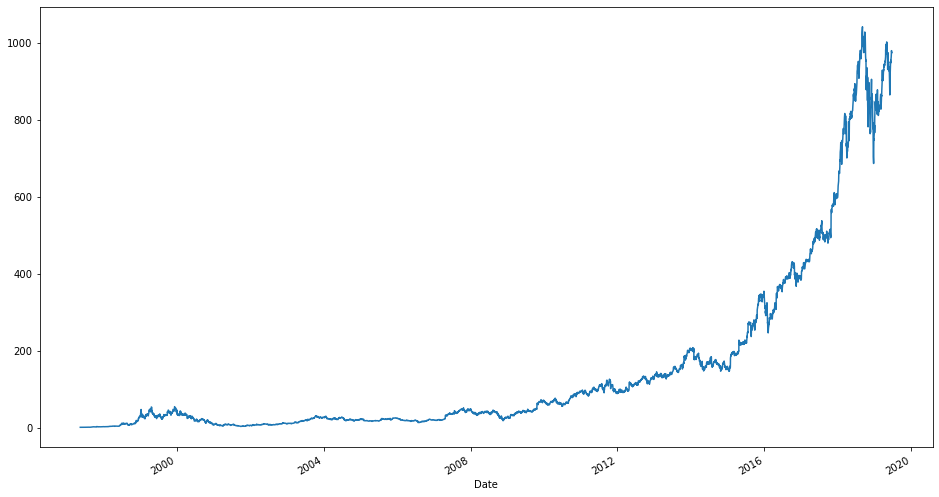

In [13]:
price_df['st_rtn'].plot(figsize=(16,9))

In [14]:
first_date = price_df.index[0]
last_date = price_df.index[-1]

In [15]:
first_date = price_df.index[0]
(price_df.loc[last_date,'Adj Close'] / price_df.loc[first_date,'Adj Close'] )

974.2744757914

In [16]:
price_df.tail()

,Adj Close,daily_rtn,st_rtn
Date,,,
2019-06-18,1901.369995,0.008133,970.912503
2019-06-19,1908.790039,0.003902,974.701462
2019-06-20,1918.189941,0.004925,979.501413
2019-06-21,1911.300049,-0.003592,975.983170
2019-06-24,1907.953857,-0.001751,974.274476


누적 수익 :  974.2744757914112


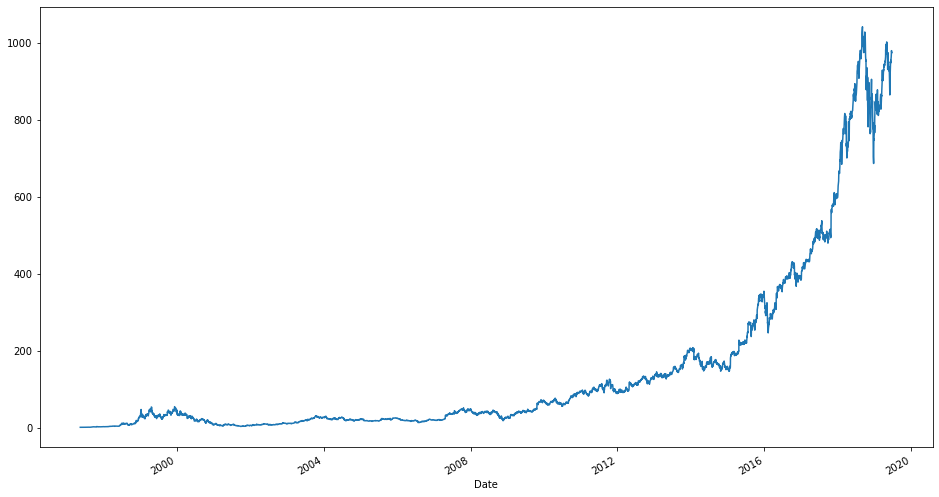

In [17]:
last_date = price_df.index[-1]
print('누적 수익 : ',price_df.loc[last_date,'st_rtn'])
price_df['st_rtn'].plot(figsize=(16,9))

누적 수익 :  10.356931096748838


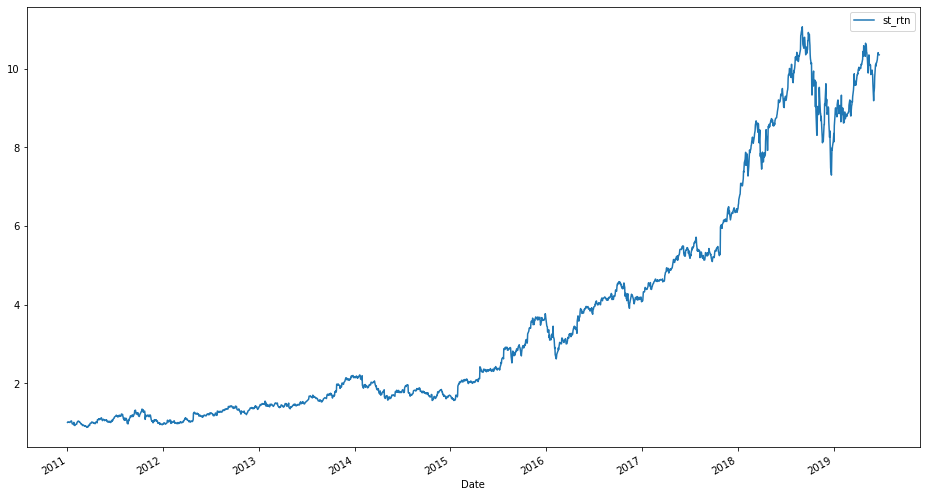

In [18]:
base_date = '2011-01-03'
tmp_df = price_df.loc[base_date:,['st_rtn']] / price_df.loc[base_date ,['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익 : ',tmp_df.loc[last_date,'st_rtn'])
tmp_df.plot(figsize=(16,9))

# Backtesting

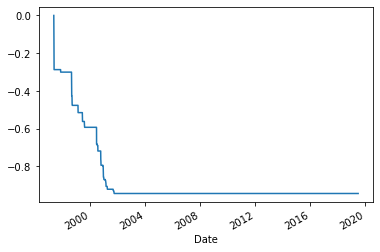

In [19]:
historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [20]:
price_df.head()

,Adj Close,daily_rtn,st_rtn
Date,,,
1997-05-15,1.958333,NaN,NaN
1997-05-16,1.729167,-0.117021,0.882979
1997-05-19,1.708333,-0.012049,0.872340
1997-05-20,1.635417,-0.042683,0.835107
1997-05-21,1.427083,-0.127389,0.728723


In [21]:
CAGR = price_df.loc['2019-06-24','st_rtn'] ** (252./len(price_df.index)) -1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()

In [22]:
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  36.58 %
Sharpe :  0.81
VOL :  60.09 %
MDD :  94.4 %
